Loan Data set
Origin:Kaggle Datasets
Author:NJERI KARUMBA
Date:03/05/2018

We start by importing the necessary libraries that we will need in our analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
import os

In [4]:
os.chdir("D:/Data scientist practice/Kaggle data sets")

In [5]:
%matplotlib inline 

In [6]:
pd.options.display.max_rows = 20
plt.rcParams['figure.figsize']=(15,8)####width 15 inches and height 8 inches

In [7]:
Loan_data=pd.read_csv("D:/Data scientist practice/Kaggle data sets/Loan payments data_2.csv")
Loan_data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,1,0
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,2,1
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,2,1
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,3,0
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,3,1
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,4,0
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,3,0
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,3,0
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,3,0
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,3,0


In [8]:
Loan_data.to_csv("outputs/tess.csv")

In [10]:
Loan_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [11]:
Loan_data.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [12]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [13]:
Loan_data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


Number of cases and variables in the data set is as shown below

In [14]:
Loan_data.shape

(500, 11)

In [15]:
Loan_data.groupby("loan_status").size()

loan_status
COLLECTION            100
COLLECTION_PAIDOFF    100
PAIDOFF               300
dtype: int64

In [16]:
Loan_data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

Grouping the data set as per the education variable

In [17]:
Loan_data.groupby("education").size()

education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
dtype: int64

In [18]:
pd.crosstab(Loan_data['loan_status'], Loan_data['education'])

education,Bechalor,High School or Below,Master or Above,college
loan_status,,,,
COLLECTION,11,49,1,39
COLLECTION_PAIDOFF,15,37,0,48
PAIDOFF,41,123,3,133


In [19]:
pd.crosstab(Loan_data['loan_status'],Loan_data['Gender'])

Gender,female,male
loan_status,,
COLLECTION,10,90
COLLECTION_PAIDOFF,14,86
PAIDOFF,53,247


We now do a scatter plot to determine if we have a clustering or classification problem
Clustering is also known as unsupervised learning whereas classification is a supervised learning

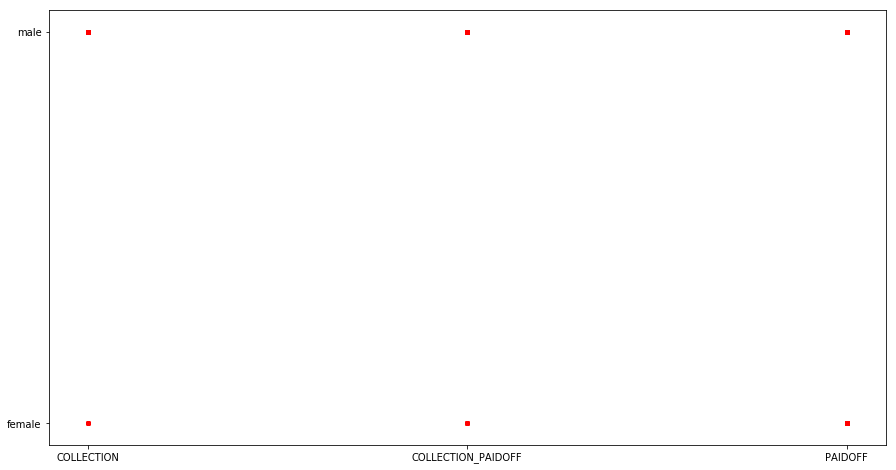

In [20]:
plt.scatter(Loan_data['loan_status'],Loan_data['Gender'],c='red', s=15)

From the scatter plot it is quite evident that we actually do not have a clustering problem but a classification problem.

DATA VISUALIZATION

A plot of the Loan status variable.
From the plot we can actually see that most of the clients had paid off their loans, collection and collection_paid off had a tie both having a count of 100

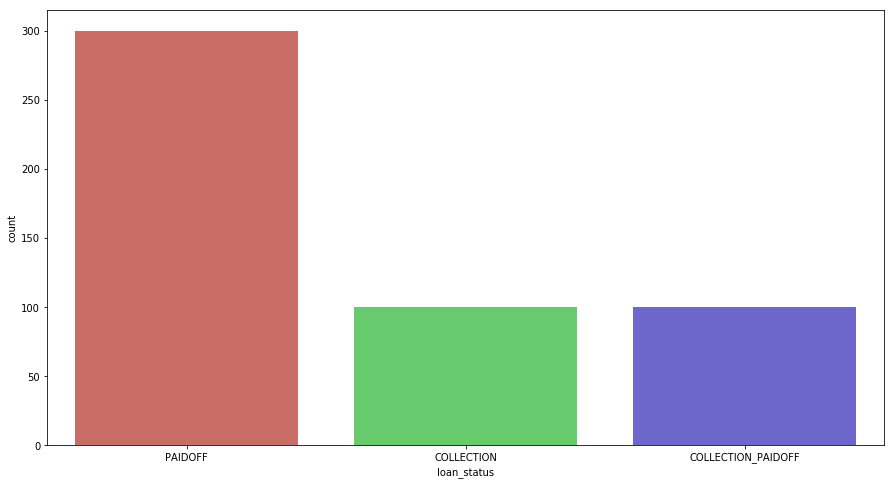

In [21]:
sns.countplot(x='loan_status',data=Loan_data,palette='hls')

Visualization of the age variable


Text(0,0.5,'Frequency')

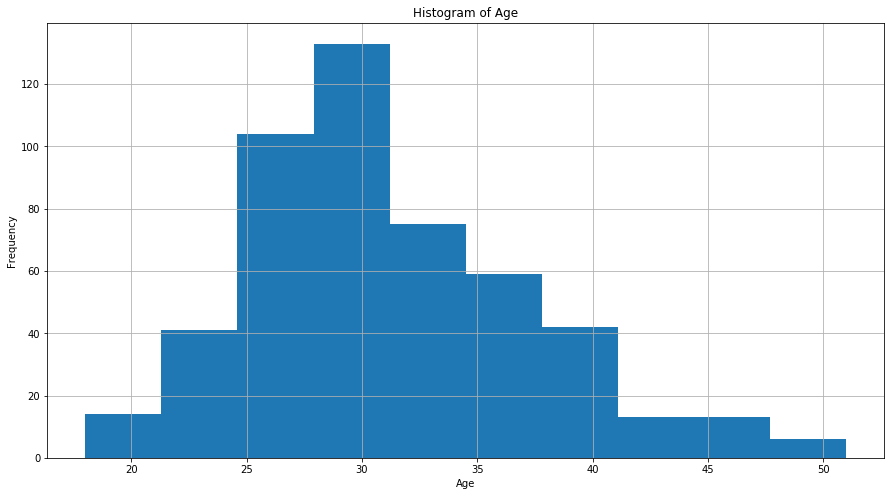

In [27]:
Loan_data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Visualization of the Education level of the respondents
Higher number of the clients had college as their highest level of education.
Very few of them had master or above as their highest level of education.

Text(0,0.5,'Frequency')

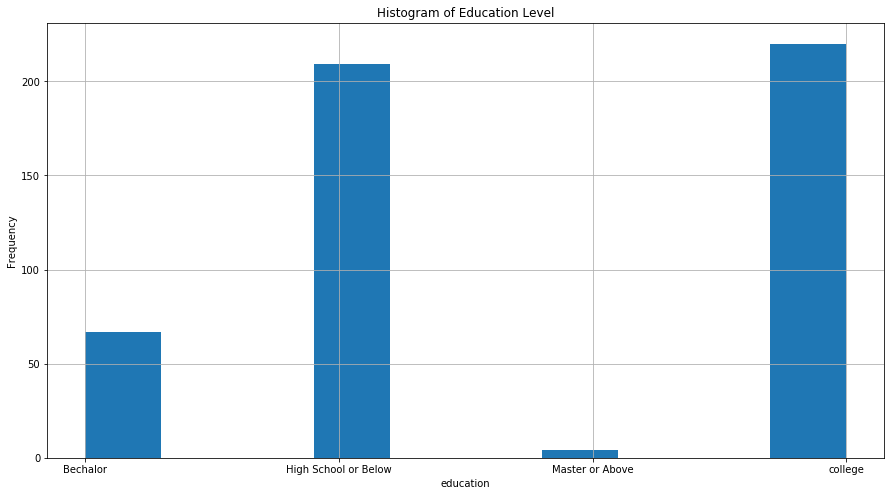

In [24]:
Loan_data.education.hist()
plt.title('Histogram of Education Level')
plt.xlabel('education')
plt.ylabel('Frequency')

Gender Visualization
0-Male 
1-Female

Text(0,0.5,'Frequency')

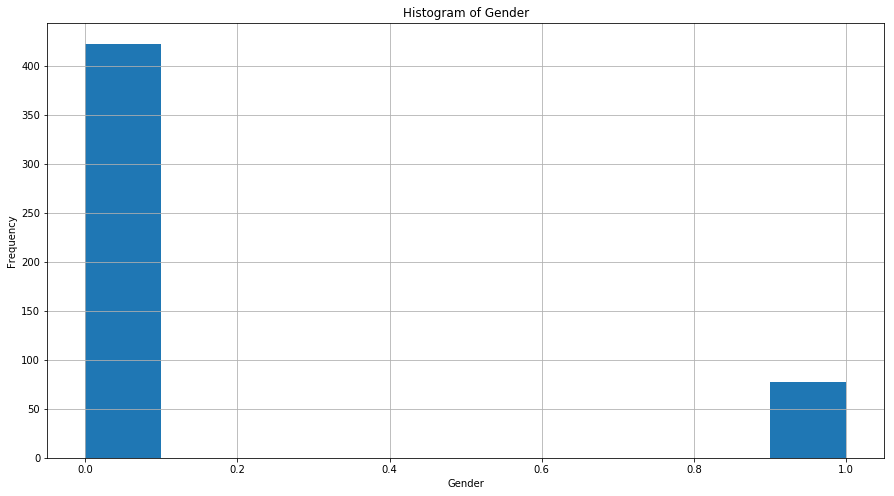

In [10]:
Loan_data.Gender.hist()
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Having realised that the problem at hand is a classification problem we go a step further to fit a multinomial logistic regression model.
We would like to predict the loan status based on the following variables;Age,Education and Gender.
We are doing a multinomial logistic regression model because the loan status has three categories.
Features are the predictor variables
Target is the dependent variable

In [30]:
features = Loan_data[['age', 'education', 'Gender']].values
target = Loan_data['loan_status'].values

Splitting the dataset


We will split our dataset into two. Train and test data set into 80:20 and random state is equal to 1.

In [39]:
(train_features, test_features, train_target, test_target) = train_test_split(features, target, test_size = 0.2, random_state = 1)

Classification

In [40]:
cls = tree.DecisionTreeClassifier()
cls.fit(train_features, train_target)
cls.score(test_features, test_target) 

0.4

This is a very low score and hence we cant really use this model to do the prediction using our test data. Checking on the correlations between the dependent and independent variables using a heatmap, the correlation is very low hence no relationship.

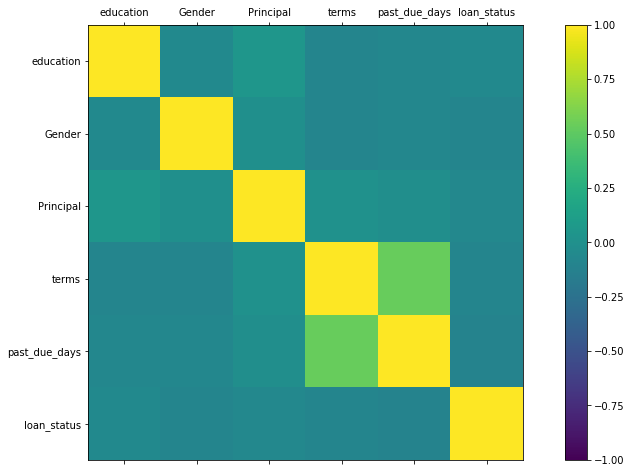

In [43]:
loan_num = Loan_data[["age","education","Gender","Principal","terms","past_due_days","loan_status"]]
correlations = loan_num.corr()

fig, ax=plt.subplots()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set(xticklabels=loan_num.columns,yticklabels=loan_num.columns)
plt.show()

Hence I will have to check on another data so as to get a better score. 